In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = './Data/us.xlsx'

phone_metrics_df = pd.read_excel(file_path, sheet_name='Phone Metrics')



In [3]:
null_counts = phone_metrics_df.isnull().sum()
print(null_counts)

lead_number                          0
first_name                         149
Lead Id                          67264
inbound_phone_call_counter       61627
mobile_number                   259514
outbound_phone_call_counter      37546
lead_stage                         209
lead_score                           0
owner                                0
activity                             0
date_of_call                         0
status                               0
call_duration_sec                    0
calls_done_by                        0
contacted                       260623
call_time                            0
calls_done_by2                       0
new_followup                    257243
sales_squad                      80908
squad_role                       80908
calls_done_by_without_spaces         0
dtype: int64


In [4]:
null_counts = phone_metrics_df.count()
print(null_counts)

lead_number                     260623
first_name                      260474
Lead Id                         193359
inbound_phone_call_counter      198996
mobile_number                     1109
outbound_phone_call_counter     223077
lead_stage                      260414
lead_score                      260623
owner                           260623
activity                        260623
date_of_call                    260623
status                          260623
call_duration_sec               260623
calls_done_by                   260623
contacted                            0
call_time                       260623
calls_done_by2                  260623
new_followup                      3380
sales_squad                     179715
squad_role                      179715
calls_done_by_without_spaces    260623
dtype: int64


In [5]:
missing_values = phone_metrics_df.isnull().sum()
missing_percentage = (missing_values / len(phone_metrics_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                              Missing Values  Percentage
lead_number                                0    0.000000
first_name                               149    0.057171
Lead Id                                67264   25.808927
inbound_phone_call_counter             61627   23.646033
mobile_number                         259514   99.574481
outbound_phone_call_counter            37546   14.406250
lead_stage                               209    0.080192
lead_score                                 0    0.000000
owner                                      0    0.000000
activity                                   0    0.000000
date_of_call                               0    0.000000
status                                     0    0.000000
call_duration_sec                          0    0.000000
calls_done_by                              0    0.000000
contacted                             260623  100.000000
call_time                                  0    0.000000
calls_done_by2                 

In [6]:
phone_metrics_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260623 entries, 0 to 260622
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   lead_number                   260623 non-null  int64         
 1   first_name                    260474 non-null  object        
 2   Lead Id                       193359 non-null  object        
 3   inbound_phone_call_counter    198996 non-null  float64       
 4   mobile_number                 1109 non-null    float64       
 5   outbound_phone_call_counter   223077 non-null  float64       
 6   lead_stage                    260414 non-null  object        
 7   lead_score                    260623 non-null  int64         
 8   owner                         260623 non-null  object        
 9   activity                      260623 non-null  object        
 10  date_of_call                  260623 non-null  datetime64[ns]
 11  status       

In [7]:
#these are removed because they are similar 
phone_metrics_df.drop(columns=[ 'calls_done_by2', 'calls_done_by_without_spaces'], inplace=True)


In [8]:
phone_metrics_df.head()

,lead_number,first_name,Lead Id,inbound_phone_call_counter,mobile_number,outbound_phone_call_counter,lead_stage,lead_score,owner,activity,date_of_call,status,call_duration_sec,calls_done_by,contacted,call_time,new_followup,sales_squad,squad_role
0,2704878,Pranav,l:861701659054416,NaN,NaN,NaN,Token Amount,1,Ratnesh Mishra,Inbound Phone Call Activity,2024-04-16 16:29:00,Answered,232,SuryanshTiwari,NaN,2024-04-16 16:29:00,NaN,Squad 3,Agent
1,2288584,Ramakrishnan,l:966563021758786,NaN,NaN,NaN,Document Collection,0,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 11:25:00,NotAnswered,0,DiptikantaJena,NaN,2024-04-17 11:25:00,NaN,Squad 1,TL
2,2721420,Purnima kuppala,l:430457079653387,NaN,NaN,NaN,Counselling Booked,2,Jatin Luthra,Inbound Phone Call Activity,2024-04-16 10:49:00,Answered,18,JatinLuthra,NaN,2024-04-16 10:49:00,NaN,Squad 3,Agent
3,693703,Sambit,NaN,NaN,NaN,NaN,Document Collection,5,Swapnil Awasthi,Outbound Phone Call Activity,2024-04-17 16:44:00,Answered,64,ChitwanSoni,NaN,2024-04-17 16:44:00,NaN,Squad 3,Agent
4,2712125,Gokul Krishna,l:1547362259166875,NaN,NaN,NaN,Token Amount,10,Simran Singh,Outbound Phone Call Activity,2024-04-16 14:53:00,Answered,12,RatneshMishra,NaN,2024-04-16 14:53:00,NaN,Squad 1,Agent


In [9]:
#If a column has a high percentage of missing values (e.g., more than 50%), it might be best to drop it, as imputing so many values can introduce significant bias.
# Example: Drop columns with more than 50% missing values
threshold = 50
columns_to_drop = missing_data[missing_data['Percentage'] > threshold].index
phone_metrics_df.drop(columns=columns_to_drop, inplace=True)


In [10]:
missing_values = phone_metrics_df.isnull().sum()
missing_percentage = (missing_values / len(phone_metrics_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                             Missing Values  Percentage
lead_number                               0    0.000000
first_name                              149    0.057171
Lead Id                               67264   25.808927
inbound_phone_call_counter            61627   23.646033
outbound_phone_call_counter           37546   14.406250
lead_stage                              209    0.080192
lead_score                                0    0.000000
owner                                     0    0.000000
activity                                  0    0.000000
date_of_call                              0    0.000000
status                                    0    0.000000
call_duration_sec                         0    0.000000
calls_done_by                             0    0.000000
call_time                                 0    0.000000
sales_squad                           80908   31.044075
squad_role                            80908   31.044075


In [11]:
#If a column has very low variance (e.g., almost all values are the same), it might not be useful for analysis or modeling.
# Example: Drop columns with low variance
low_variance_cols = [col for col in phone_metrics_df.columns if phone_metrics_df[col].nunique() <= 1]
phone_metrics_df.drop(columns=low_variance_cols, inplace=True)


first_name:

Typically, a first name does not contribute to the prediction of lead scores or any other business metrics. It is usually an identifier that doesn't have predictive power.
owner:

Unless you are analyzing performance based on different lead owners, this column might not provide useful information for predicting lead scores or outcomes. It could be more relevant for internal performance tracking rather than modeling.
activity:

This column could be relevant if the specific activities (e.g., called, emailed) are linked to lead outcomes. However, without detailed analysis, it might be considered noise, especially if it contains a large variety of unique entries without clear predictive patterns.
status:

If the status column has low variance (e.g., most leads have the same status) or if it doesn't correlate well with the target variable (lead score), it might not be useful for prediction.


In [12]:
irrelevant_columns = [
    'first_name',                 # Non-informative for lead scoring
    'owner',                      # Non-informative unless specific to the analysis
    'activity',                   # Non-informative unless activity types are linked to the target
    'status',                     # Considered if it has low variance or is non-informative
]

# Drop irrelevant columns
phone_metrics_df.drop(columns=irrelevant_columns, inplace=True)


In [13]:
missing_values = phone_metrics_df.isnull().sum()
missing_percentage = (missing_values / len(phone_metrics_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                             Missing Values  Percentage
lead_number                               0    0.000000
Lead Id                               67264   25.808927
inbound_phone_call_counter            61627   23.646033
outbound_phone_call_counter           37546   14.406250
lead_stage                              209    0.080192
lead_score                                0    0.000000
date_of_call                              0    0.000000
call_duration_sec                         0    0.000000
calls_done_by                             0    0.000000
call_time                                 0    0.000000
sales_squad                           80908   31.044075
squad_role                            80908   31.044075


In [14]:
phone_metrics_df['inbound_phone_call_counter'].fillna(0, inplace=True)
phone_metrics_df['outbound_phone_call_counter'].fillna(0, inplace=True)
phone_metrics_df['lead_score'].fillna(0, inplace=True)
phone_metrics_df['lead_stage'].fillna('Unknown', inplace=True)
phone_metrics_df['Lead Id'].fillna('Unknown', inplace=True)
phone_metrics_df['call_duration_sec'].fillna(0, inplace=True)
phone_metrics_df['sales_squad'].fillna('Unknown', inplace=True)
phone_metrics_df['squad_role'].fillna('Team Member', inplace=True)


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/4133013108.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  phone_metrics_df['inbound_phone_call_counter'].fillna(0, inplace=True)
/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/4133013108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we a

In [15]:
phone_metrics_df['inbound_phone_call_counter'] = phone_metrics_df['inbound_phone_call_counter'].astype(int)
phone_metrics_df['outbound_phone_call_counter'] = phone_metrics_df['outbound_phone_call_counter'].astype(int)
phone_metrics_df['lead_score'] = phone_metrics_df['lead_score'].astype(int)
phone_metrics_df['call_duration_sec'] = phone_metrics_df['call_duration_sec'].astype(int)


In [16]:
missing_values = phone_metrics_df.isnull().sum()
missing_percentage = (missing_values / len(phone_metrics_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                             Missing Values  Percentage
lead_number                               0         0.0
Lead Id                                   0         0.0
inbound_phone_call_counter                0         0.0
outbound_phone_call_counter               0         0.0
lead_stage                                0         0.0
lead_score                                0         0.0
date_of_call                              0         0.0
call_duration_sec                         0         0.0
calls_done_by                             0         0.0
call_time                                 0         0.0
sales_squad                               0         0.0
squad_role                                0         0.0


In [17]:
phone_metrics_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260623 entries, 0 to 260622
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   lead_number                  260623 non-null  int64         
 1   Lead Id                      260623 non-null  object        
 2   inbound_phone_call_counter   260623 non-null  int64         
 3   outbound_phone_call_counter  260623 non-null  int64         
 4   lead_stage                   260623 non-null  object        
 5   lead_score                   260623 non-null  int64         
 6   date_of_call                 260623 non-null  datetime64[ns]
 7   call_duration_sec            260623 non-null  int64         
 8   calls_done_by                260623 non-null  object        
 9   call_time                    260623 non-null  datetime64[ns]
 10  sales_squad                  260623 non-null  object        
 11  squad_role                

In [18]:
excel_filename = 'Cleanphone_metrics.xlsx'
phone_metrics_df.to_excel(excel_filename, index=False)

In [19]:
# Summary statistics for numerical columns
summary_stats = phone_metrics_df.describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
         lead_number  inbound_phone_call_counter  outbound_phone_call_counter  \
count  2.606230e+05               260623.000000                260623.000000   
mean   1.939974e+06                    0.433534                     6.314266   
min    1.765200e+04                    0.000000                     0.000000   
25%    9.159650e+05                    0.000000                     2.000000   
50%    2.283547e+06                    0.000000                     4.000000   
75%    2.474102e+06                    0.000000                     8.000000   
max    2.758575e+06                  115.000000                   171.000000   
std    7.606800e+05                    3.188072                     8.830766   

          lead_score                   date_of_call  call_duration_sec  \
count  260623.000000                         260623      260623.000000   
mean        0.991455  2024-02-29 14:50:28.887933696          60.556893   
min       -85.000000            2023

In [20]:
categorical_cols = ['lead_stage', 'calls_done_by', 'call_time', 'sales_squad', 'squad_role']
categorical_distributions = phone_metrics_df[categorical_cols].apply(pd.Series.value_counts)
print("Categorical Distributions:\n", categorical_distributions)


Categorical Distributions:
                           lead_stage  calls_done_by  call_time  sales_squad  \
2023-10-15 00:00:00              NaN            NaN       68.0          NaN   
2023-10-15 10:56:00              NaN            NaN        1.0          NaN   
2023-10-15 10:57:00              NaN            NaN        1.0          NaN   
2023-10-15 10:58:00              NaN            NaN        1.0          NaN   
2023-10-15 10:59:00              NaN            NaN        1.0          NaN   
...                              ...            ...        ...          ...   
Waiting for Offer Letter       430.0            NaN        NaN          NaN   
Warm                         13859.0            NaN        NaN          NaN   
Wrong Number                    39.0            NaN        NaN          NaN   
payaldhiman                      NaN         6724.0        NaN          NaN   
yashitiwari                      NaN         4535.0        NaN          NaN   

                       

In [21]:
#Distribution Plots for Numerical Columns

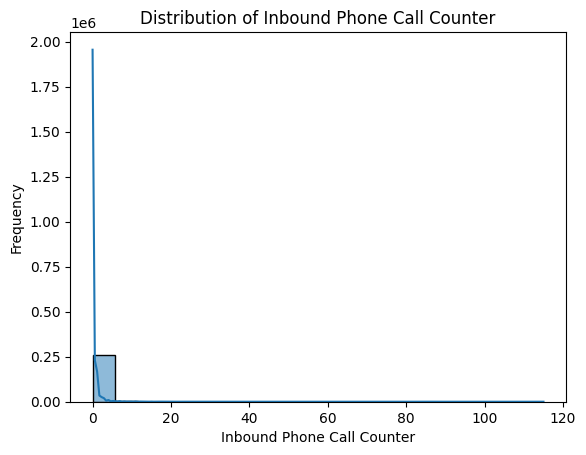

In [22]:
sns.histplot(phone_metrics_df['inbound_phone_call_counter'], bins=20, kde=True)
plt.title('Distribution of Inbound Phone Call Counter')
plt.xlabel('Inbound Phone Call Counter')
plt.ylabel('Frequency')
plt.show()

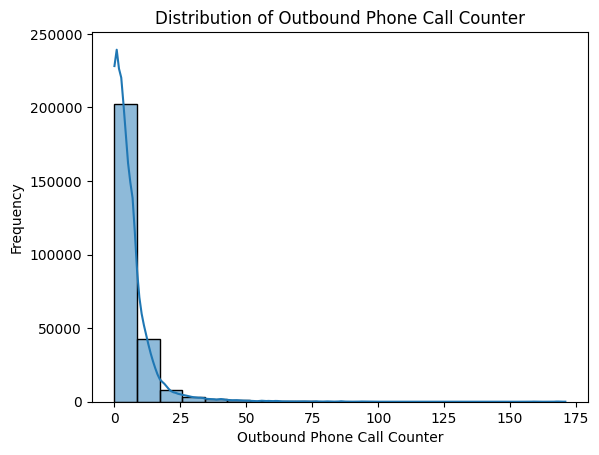

In [23]:
sns.histplot(phone_metrics_df['outbound_phone_call_counter'], bins=20, kde=True)
plt.title('Distribution of Outbound Phone Call Counter')
plt.xlabel('Outbound Phone Call Counter')
plt.ylabel('Frequency')
plt.show()

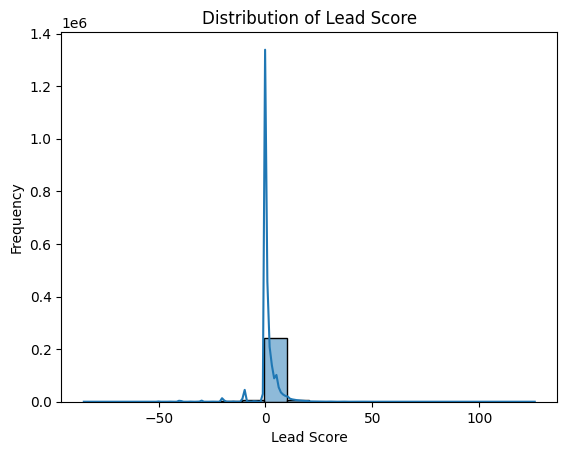

In [24]:
sns.histplot(phone_metrics_df['lead_score'], bins=20, kde=True)
plt.title('Distribution of Lead Score')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.show()


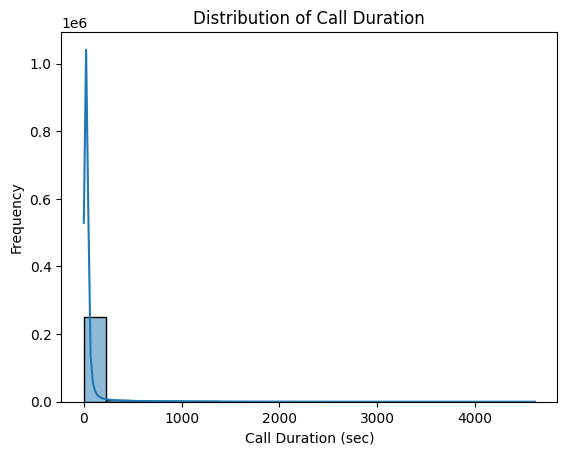

In [25]:
sns.histplot(phone_metrics_df['call_duration_sec'], bins=20, kde=True)
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (sec)')
plt.ylabel('Frequency')
plt.show()


In [26]:
#Count Plots for Categorical Columns        

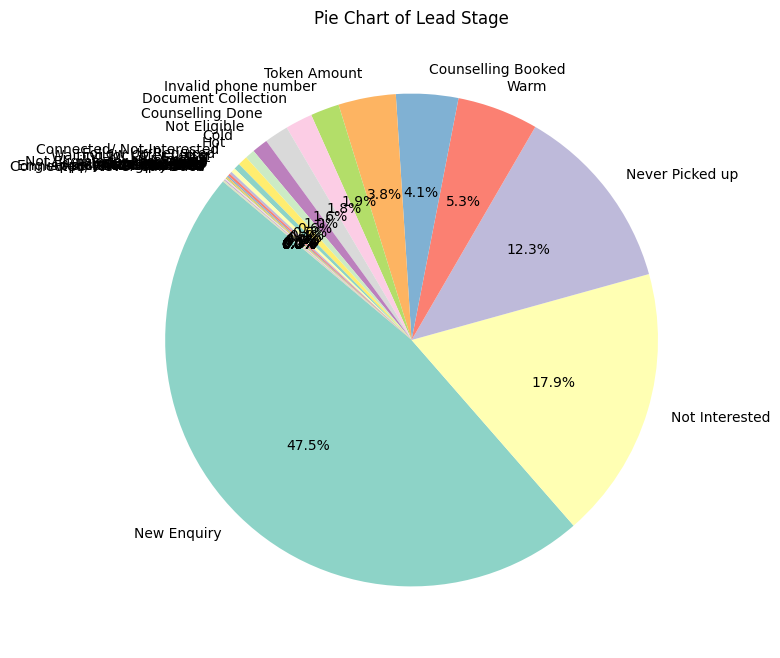

In [27]:
phone_metrics_df['lead_stage'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), colors=sns.color_palette('Set3'))
plt.title('Pie Chart of Lead Stage')
plt.ylabel('')
plt.show()


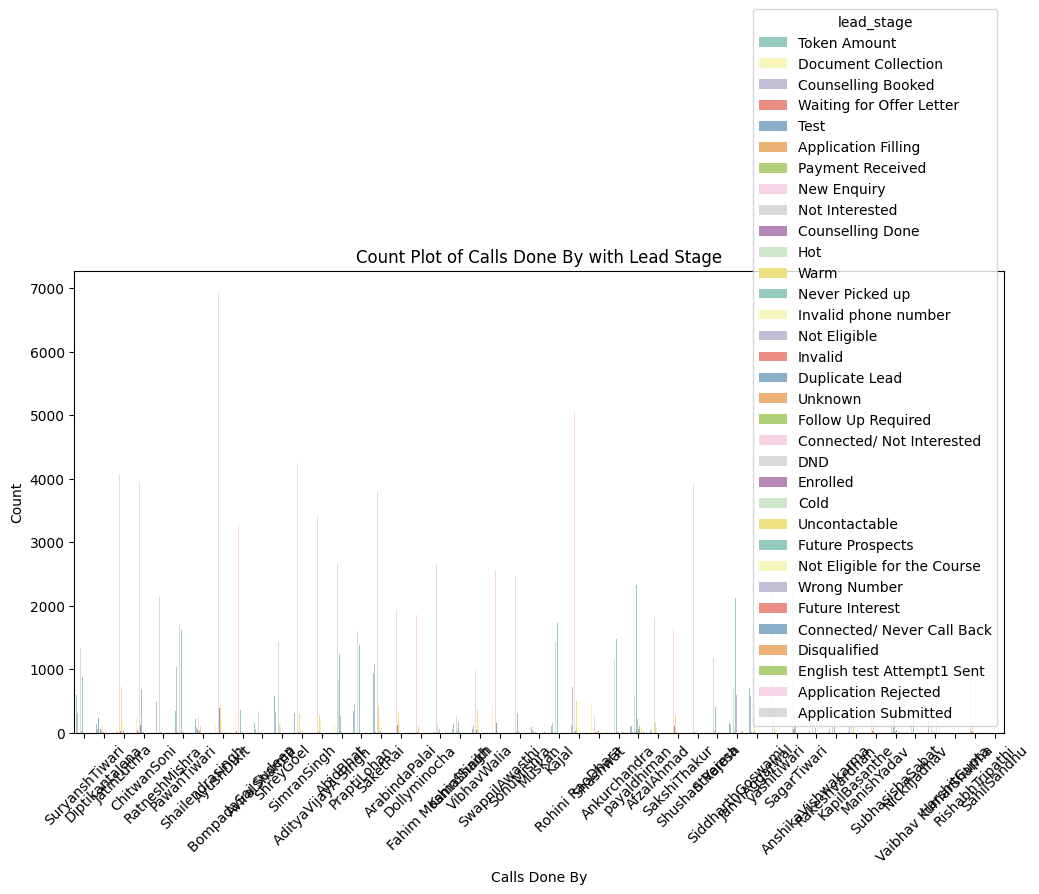

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='calls_done_by', hue='lead_stage', data=phone_metrics_df, palette='Set3')
plt.title('Count Plot of Calls Done By with Lead Stage')
plt.xlabel('Calls Done By')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [30]:
phone_metrics_df.head

<bound method NDFrame.head of         lead_number             Lead Id  inbound_phone_call_counter  \
0           2704878   l:861701659054416                           0   
1           2288584   l:966563021758786                           0   
2           2721420   l:430457079653387                           0   
3            693703             Unknown                           0   
4           2712125  l:1547362259166875                           0   
...             ...                 ...                         ...   
260618       703645             Unknown                           0   
260619      2704878   l:861701659054416                           3   
260620      2293137  l:3609611255969786                           0   
260621      2293667  l:8106492436034710                           2   
260622      2293838  l:1816060162176982                           0   

        outbound_phone_call_counter           lead_stage  lead_score  \
0                                 0         T

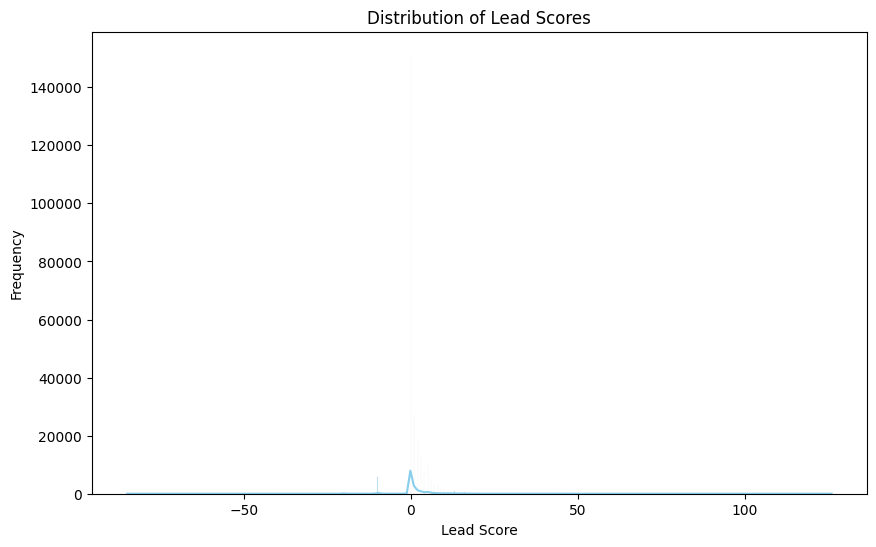

In [38]:
# 1. Distribution of Lead Scores
plt.figure(figsize=(10, 6))
sns.histplot(phone_metrics_df['lead_score'], kde=True, color='skyblue')
plt.title('Distribution of Lead Scores')
plt.xlabel('Lead Score')
plt.ylabel('Frequency')
plt.show()

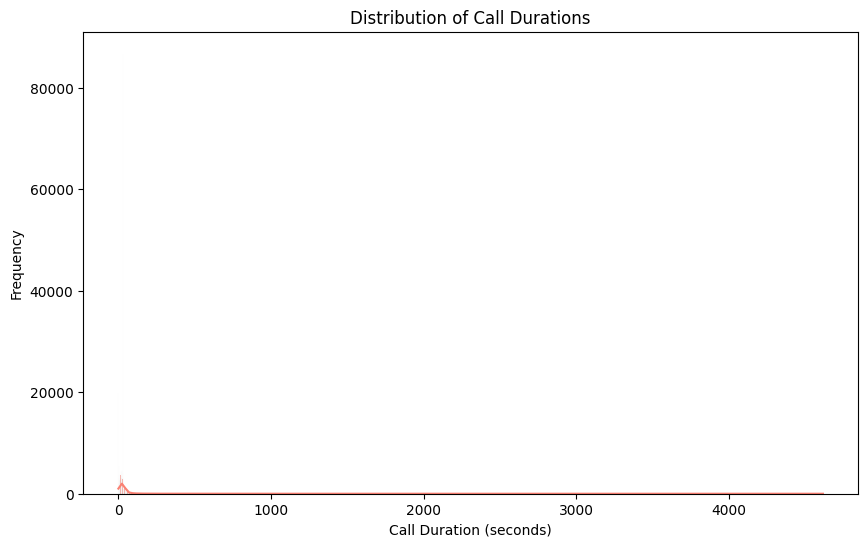

In [39]:
#Distribution of Call Durations
plt.figure(figsize=(10, 6))
sns.histplot(phone_metrics_df['call_duration_sec'], kde=True, color='salmon')
plt.title('Distribution of Call Durations')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Frequency')
plt.show()


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/1045027311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='lead_stage', data=phone_metrics_df, palette='viridis', order=phone_metrics_df['lead_stage'].value_counts().index)


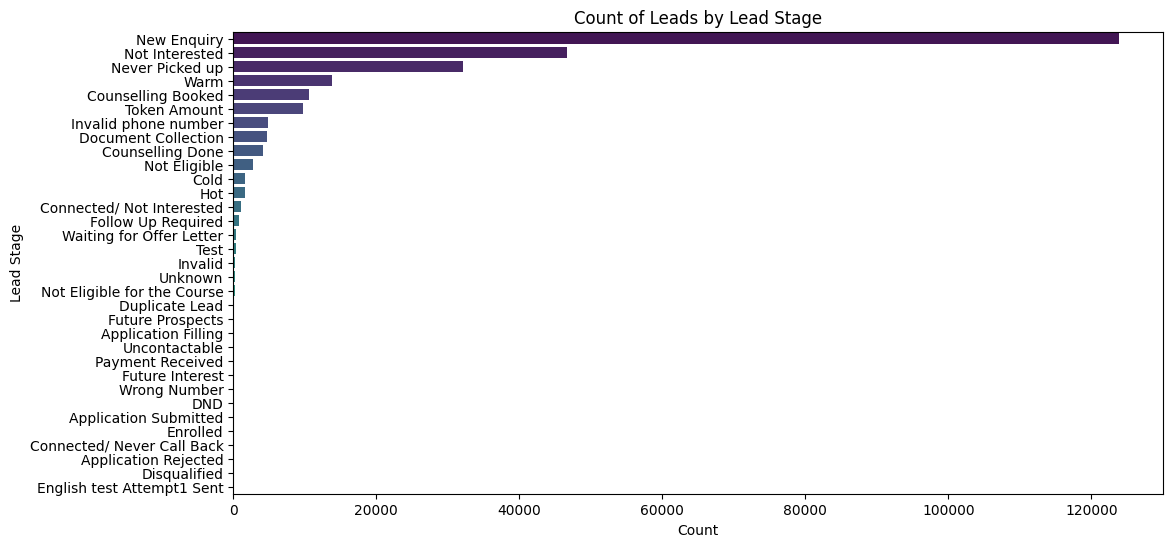

In [40]:
#Count of Leads by Lead Stage
plt.figure(figsize=(12, 6))
sns.countplot(y='lead_stage', data=phone_metrics_df, palette='viridis', order=phone_metrics_df['lead_stage'].value_counts().index)
plt.title('Count of Leads by Lead Stage')
plt.xlabel('Count')
plt.ylabel('Lead Stage')
plt.show()


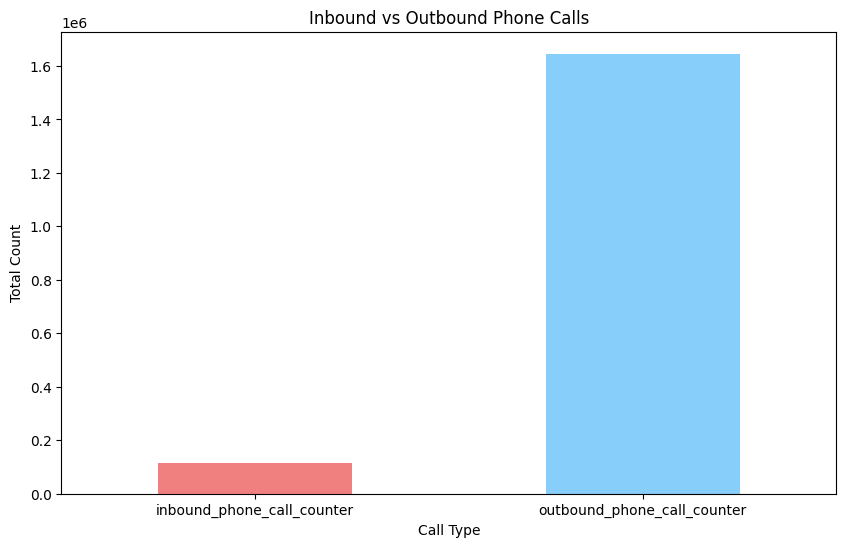

In [41]:
#4. Inbound vs Outbound Phone Calls
plt.figure(figsize=(10, 6))
phone_metrics_df[['inbound_phone_call_counter', 'outbound_phone_call_counter']].sum().plot(kind='bar', color=['lightcoral', 'lightskyblue'])
plt.title('Inbound vs Outbound Phone Calls')
plt.xlabel('Call Type')
plt.ylabel('Total Count')
plt.xticks(rotation=0)
plt.show()

/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/878641507.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lead_stage', y='call_duration_sec', data=avg_call_duration, palette='coolwarm')


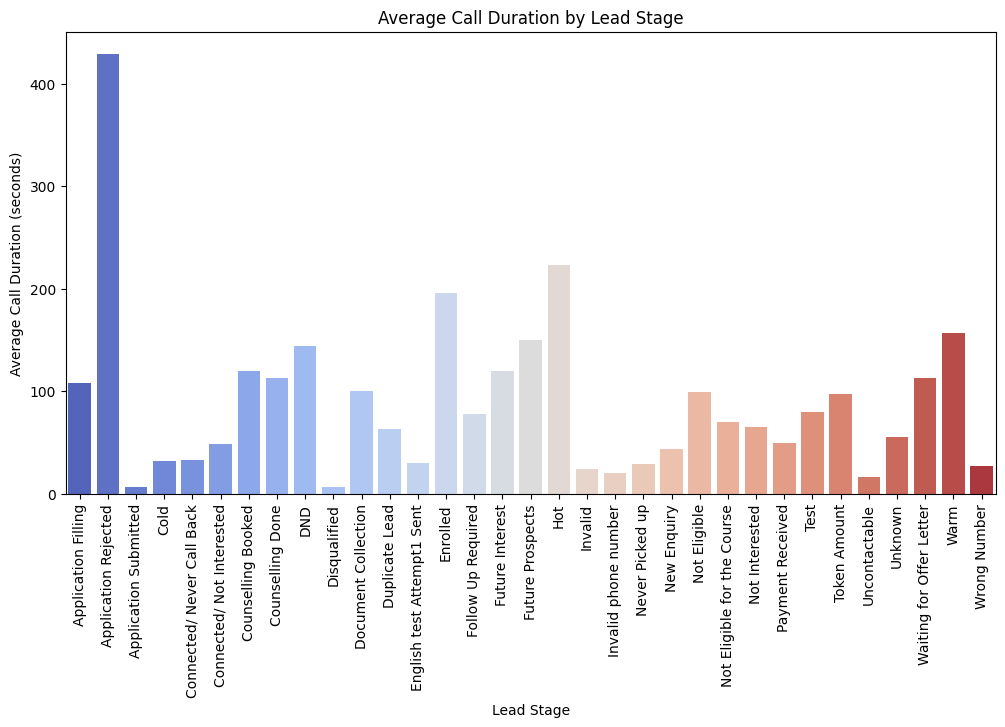

In [44]:
#7. Average Call Duration by Lead Stage
plt.figure(figsize=(12, 6))
avg_call_duration = phone_metrics_df.groupby('lead_stage')['call_duration_sec'].mean().reset_index()
sns.barplot(x='lead_stage', y='call_duration_sec', data=avg_call_duration, palette='coolwarm')
plt.title('Average Call Duration by Lead Stage')
plt.xlabel('Lead Stage')
plt.ylabel('Average Call Duration (seconds)')
plt.xticks(rotation=90)
plt.show()


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/4169794365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='calls_done_by', data=phone_metrics_df[phone_metrics_df['calls_done_by'].isin(top_callers)], palette='pastel')


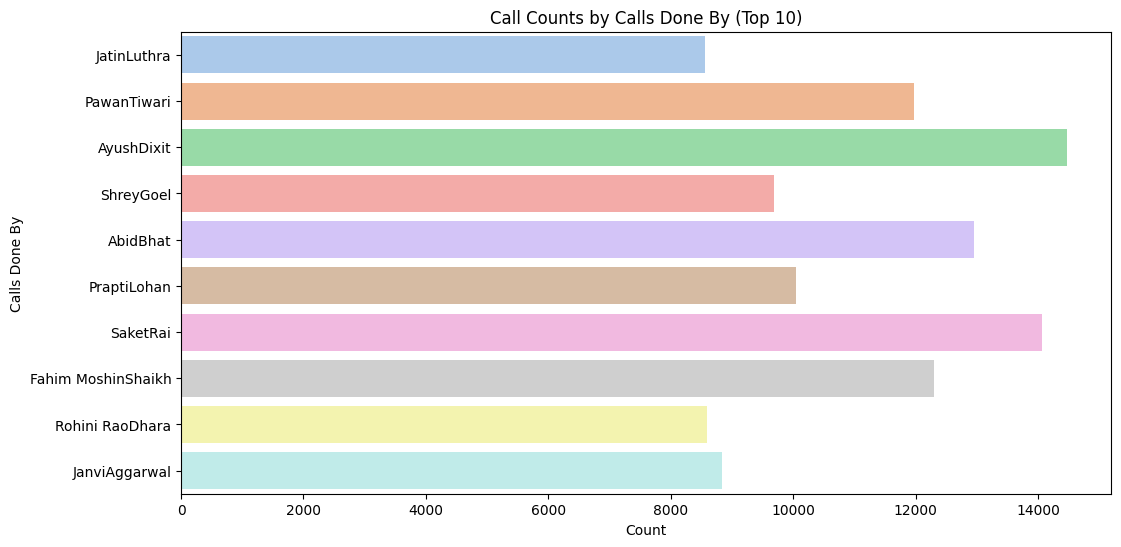

In [45]:
#8. Call Counts by Calls Done By
plt.figure(figsize=(12, 6))
top_callers = phone_metrics_df['calls_done_by'].value_counts().head(10).index
sns.countplot(y='calls_done_by', data=phone_metrics_df[phone_metrics_df['calls_done_by'].isin(top_callers)], palette='pastel')
plt.title('Call Counts by Calls Done By (Top 10)')
plt.xlabel('Count')
plt.ylabel('Calls Done By')
plt.show()


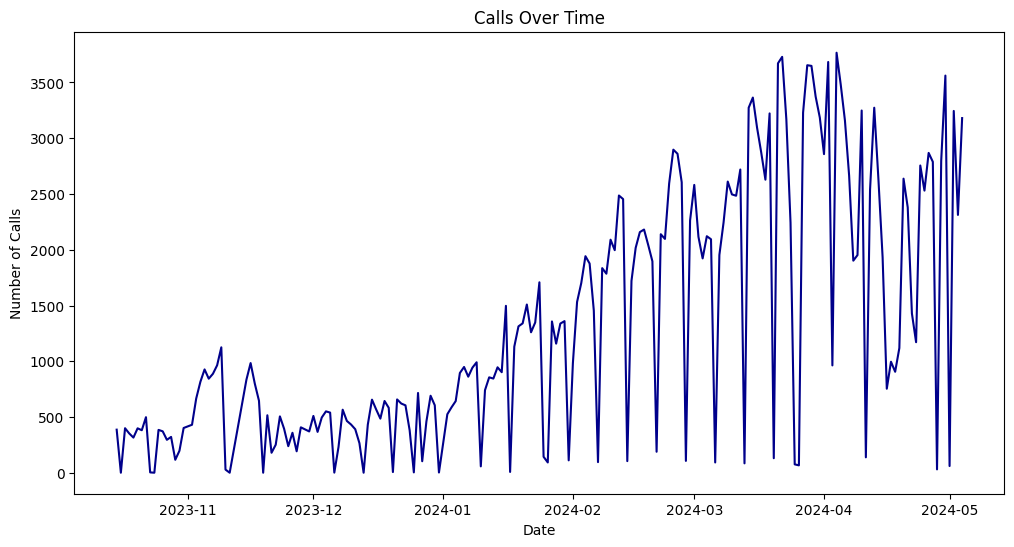

In [47]:
#9. Calls Over Time
plt.figure(figsize=(12, 6))
phone_metrics_df['date_of_call'] = pd.to_datetime(phone_metrics_df['date_of_call'])
calls_over_time = phone_metrics_df.groupby(phone_metrics_df['date_of_call'].dt.date).size().reset_index(name='count')
sns.lineplot(x='date_of_call', y='count', data=calls_over_time, color='darkblue')
plt.title('Calls Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/2490530313.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='squad_role', y='lead_score', data=phone_metrics_df, palette='muted')


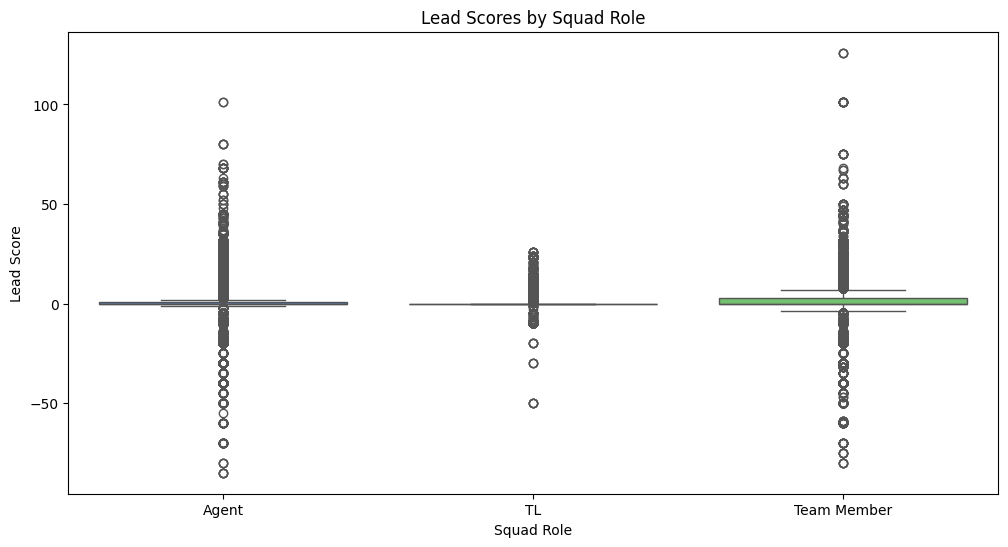

In [48]:
#10. Lead Scores by Squad Role
plt.figure(figsize=(12, 6))
sns.boxplot(x='squad_role', y='lead_score', data=phone_metrics_df, palette='muted')
plt.title('Lead Scores by Squad Role')
plt.xlabel('Squad Role')
plt.ylabel('Lead Score')
plt.show()


/var/folders/wd/kq4407vd7d391xkvr99h17m80000gn/T/ipykernel_62894/1082478103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='squad_role', y='call_duration_sec', data=phone_metrics_df, palette='bright')


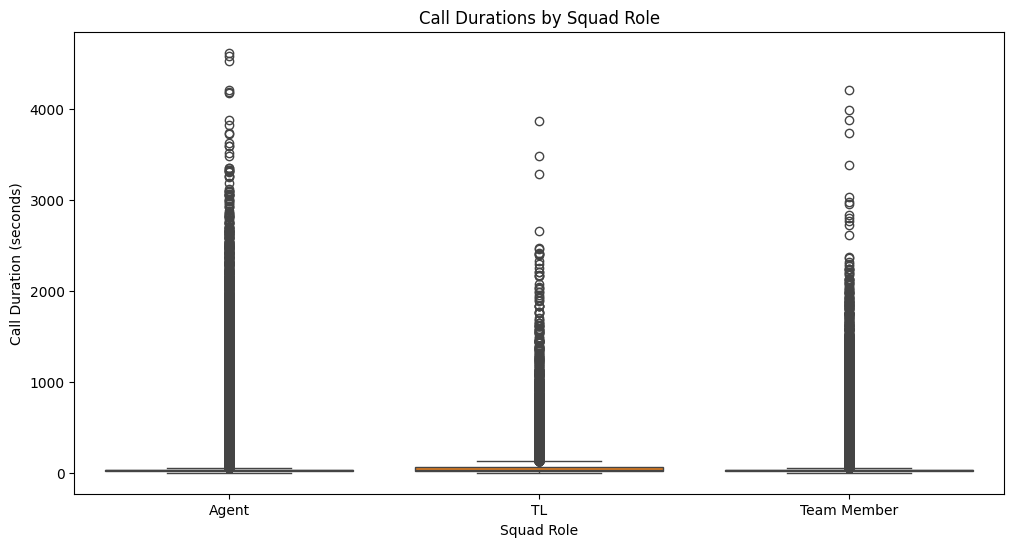

In [49]:
# 11. Call Durations by Squad Role
plt.figure(figsize=(12, 6))
sns.boxplot(x='squad_role', y='call_duration_sec', data=phone_metrics_df, palette='bright')
plt.title('Call Durations by Squad Role')
plt.xlabel('Squad Role')
plt.ylabel('Call Duration (seconds)')
plt.show()


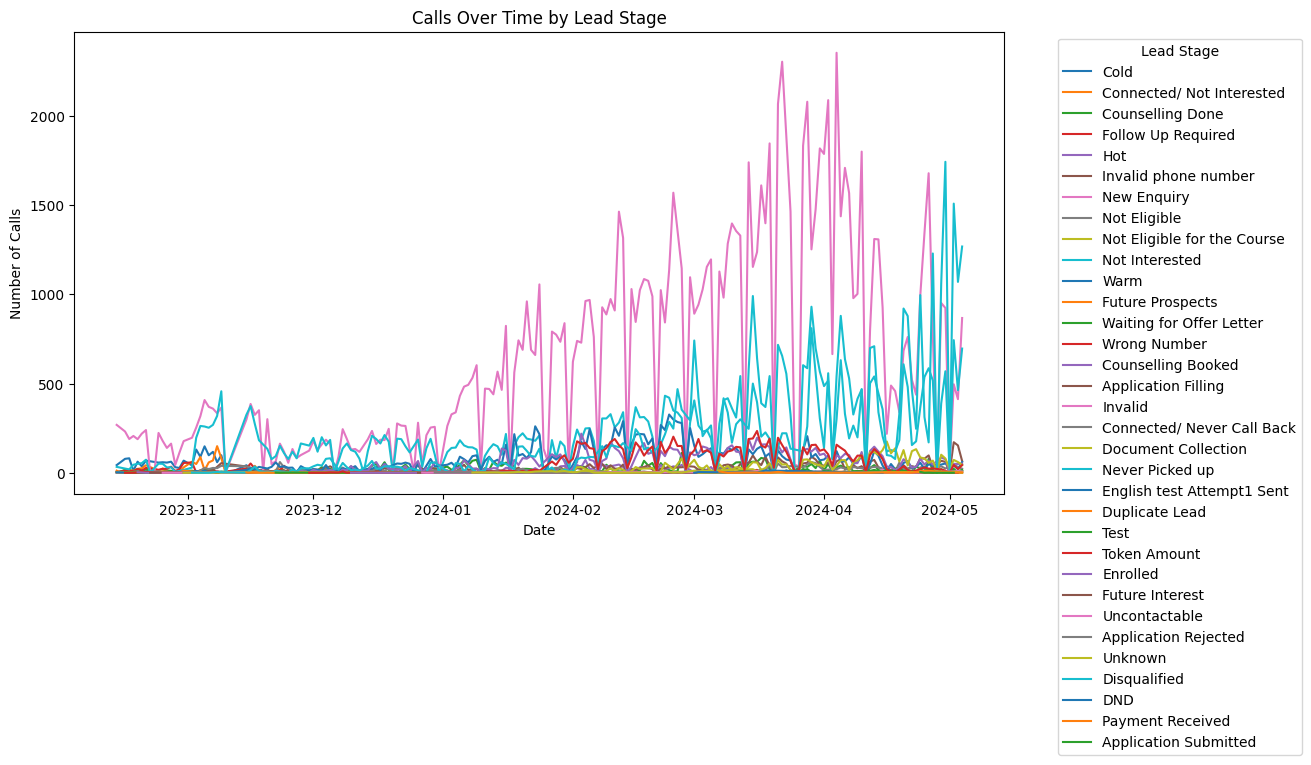

In [51]:
# 12. Calls Over Time by Lead Stage
plt.figure(figsize=(12, 6))
calls_by_stage = phone_metrics_df.groupby([phone_metrics_df['date_of_call'].dt.date, 'lead_stage']).size().reset_index(name='count')
sns.lineplot(x='date_of_call', y='count', hue='lead_stage', data=calls_by_stage, palette='tab10')
plt.title('Calls Over Time by Lead Stage')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.legend(title='Lead Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


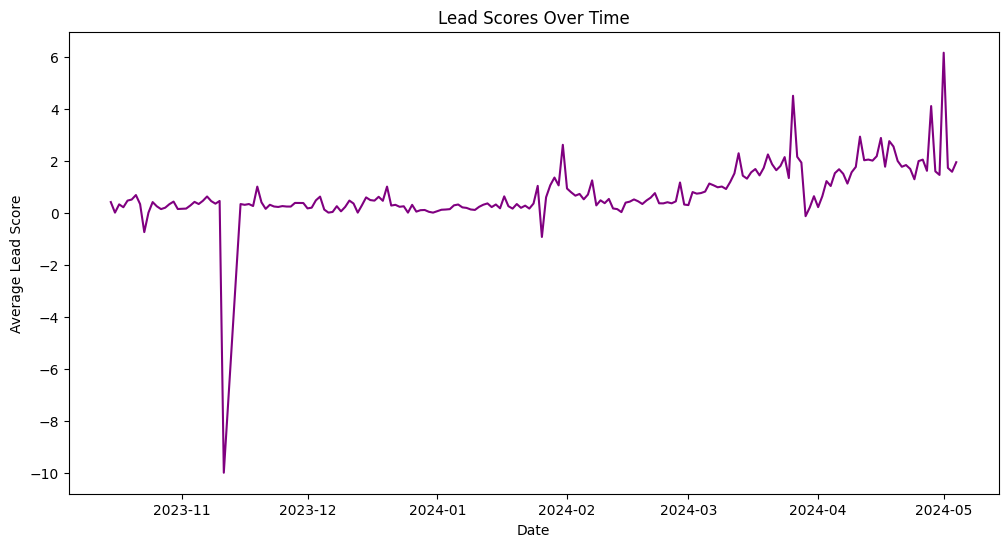

In [52]:
# 13. Lead Scores Over Time
plt.figure(figsize=(12, 6))
lead_scores_over_time = phone_metrics_df.groupby(phone_metrics_df['date_of_call'].dt.date)['lead_score'].mean().reset_index()
sns.lineplot(x='date_of_call', y='lead_score', data=lead_scores_over_time, color='purple')
plt.title('Lead Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Average Lead Score')
plt.show()


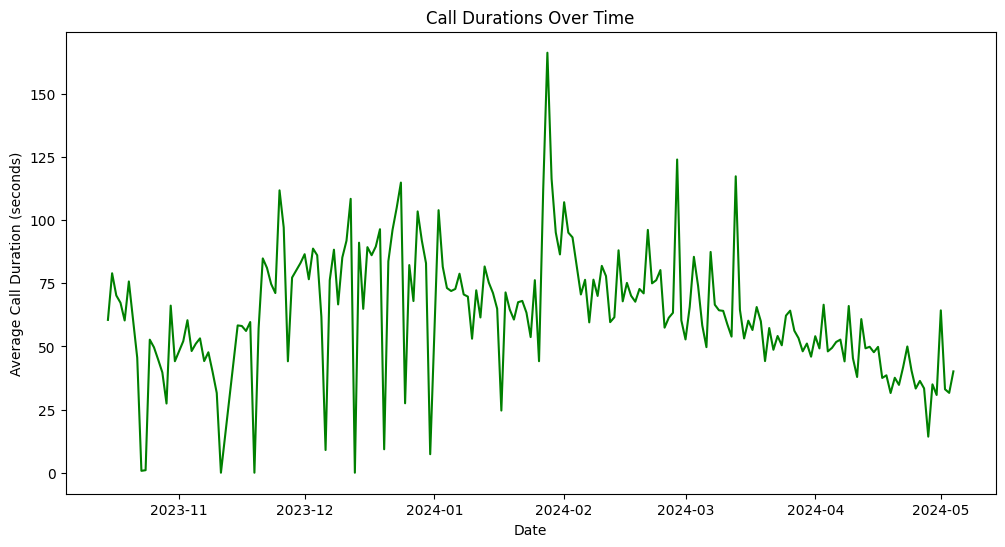

In [53]:
# 14. Call Durations Over Time
plt.figure(figsize=(12, 6))
call_durations_over_time = phone_metrics_df.groupby(phone_metrics_df['date_of_call'].dt.date)['call_duration_sec'].mean().reset_index()
sns.lineplot(x='date_of_call', y='call_duration_sec', data=call_durations_over_time, color='green')
plt.title('Call Durations Over Time')
plt.xlabel('Date')
plt.ylabel('Average Call Duration (seconds)')
plt.show()
